<a href="https://colab.research.google.com/github/auliaslsblc/nlpcc-ui-2025/blob/main/week5_6_task1_chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Simple LLM Chat Application

In [ ]:
# week5_6_task1_chat_openai.ipynb

# 1. Install library yang dibutuhkan untuk OpenAI
!pip install -q openai

# 2. Konfigurasi API Key dari Colab Secrets
import os
from google.colab import userdata
from openai import OpenAI # Import klien OpenAI

# Dapatkan API Key dari Colab Secrets.
# Pastikan Anda sudah menyimpan API Key OpenAI dengan nama 'OPENAI_API_KEY' di Colab Secrets.
try:
    # Mengambil API Key dengan nama 'OPENAI_API_KEY'
    API_KEY = userdata.get('OPENAI_API_KEY')
    if API_KEY is None:
        raise ValueError("OPENAI_API_KEY tidak ditemukan di Colab Secrets.")
except Exception as e:
    print(f"Error saat mengambil API Key dari Colab Secrets: {e}")
    print("Pastikan Anda sudah menyimpan 'OPENAI_API_KEY' di Colab Secrets dan mencentang 'Notebook access'.")
    exit() # Keluar dari program jika API Key tidak ditemukan

# Inisialisasi klien OpenAI dengan API Key Anda
client = OpenAI(api_key=API_KEY)

# 3. Mulai Sesi Obrolan dengan riwayat pesan
# Riwayat percakapan akan disimpan dalam bentuk list dictionaries
# Setiap dictionary mewakili peran (role) dan konten (content) pesan
messages = [
    {"role": "system", "content": "Anda adalah asisten AI yang ramah dan membantu."}
]

print("Selamat datang di Obrolan LLM Sederhana (OpenAI)! Ketik 'exit' atau 'quit' untuk keluar.")

# Loop utama untuk interaksi obrolan
while True:
    user_input = input("Anda: ")

    if user_input.lower() in ["exit", "quit"]:
        print("Sampai jumpa!")
        break

    # Tambahkan pesan pengguna ke riwayat
    messages.append({"role": "user", "content": user_input})

    try:
        # Kirim riwayat percakapan ke API OpenAI
        response = client.chat.completions.create(
            model="gpt-4o", # Menggunakan gpt-4o, Anda bisa ganti ke model lain seperti "gpt-3.5-turbo"
            messages=messages
        )

        # Ambil respons dari model
        llm_response = response.choices[0].message.content

        # Tampilkan respons dari model
        print("LLM:", llm_response)

        # Tambahkan respons LLM ke riwayat
        messages.append({"role": "assistant", "content": llm_response})

    except Exception as e:
        print(f"Terjadi kesalahan: {e}")
        print("Silakan coba lagi.")

Selamat datang di Obrolan LLM Sederhana (OpenAI)! Ketik 'exit' atau 'quit' untuk keluar.
Anda: halo apakabar ?
LLM: Halo! Saya baik-baik saja, terima kasih. Bagaimana dengan Anda? Ada yang bisa saya bantu hari ini?
Anda: Bisakah kamu ceritakan sesuatu yang menarik tentang astronomi?
LLM: Tentu! Salah satu fakta menarik tentang astronomi adalah keberadaan bintang neutron. Bintang neutron adalah sisa inti dari bintang yang telah meledak dalam supernova. Meskipun ukurannya sangat kecil—hanya sekitar 10 hingga 20 kilometer dalam diameter—mereka memiliki massa yang lebih besar dari Matahari kita!

Ini berarti bahwa materi di bintang neutron begitu padat, satu sendok teh materi bintang neutron bisa memiliki berat sekitar 6 miliar ton di Bumi. Bintang-bintang ini memiliki medan magnet yang sangat kuat dan dapat berputar sangat cepat, hingga ratusan kali per detik. Fenomena ini membuat bintang neutron menjadi salah satu objek paling ekstrem dan menarik di alam semesta. 

Apakah ada hal lain te

Aplikasi obrolan sederhana ini dibuat di Google Colab untuk berinteraksi dengan kecerdasan buatan OpenAI. Cara menjalankannya cukup mudah: pertama, instal library OpenAI. Kedua, Anda perlu mendapatkan API Key OpenAI (yang dimulai dengan sk-) dari situs web OpenAI dan menyimpannya secara aman di Colab Secrets dengan nama OPENAI_API_KEY. Setelah itu, jalankan semua kode di notebook. Aplikasi ini dirancang untuk multi-putar, artinya ia bisa mengingat percakapan sebelumnya sehingga responsnya lebih nyambung. Jadi, Anda bisa ngobrol seperti biasa, dan AI akan memberikan jawaban yang relevan. Saat sudah selesai, cukup ketik exit atau quit.

## Screenshoot Obrolan LLM Sederhana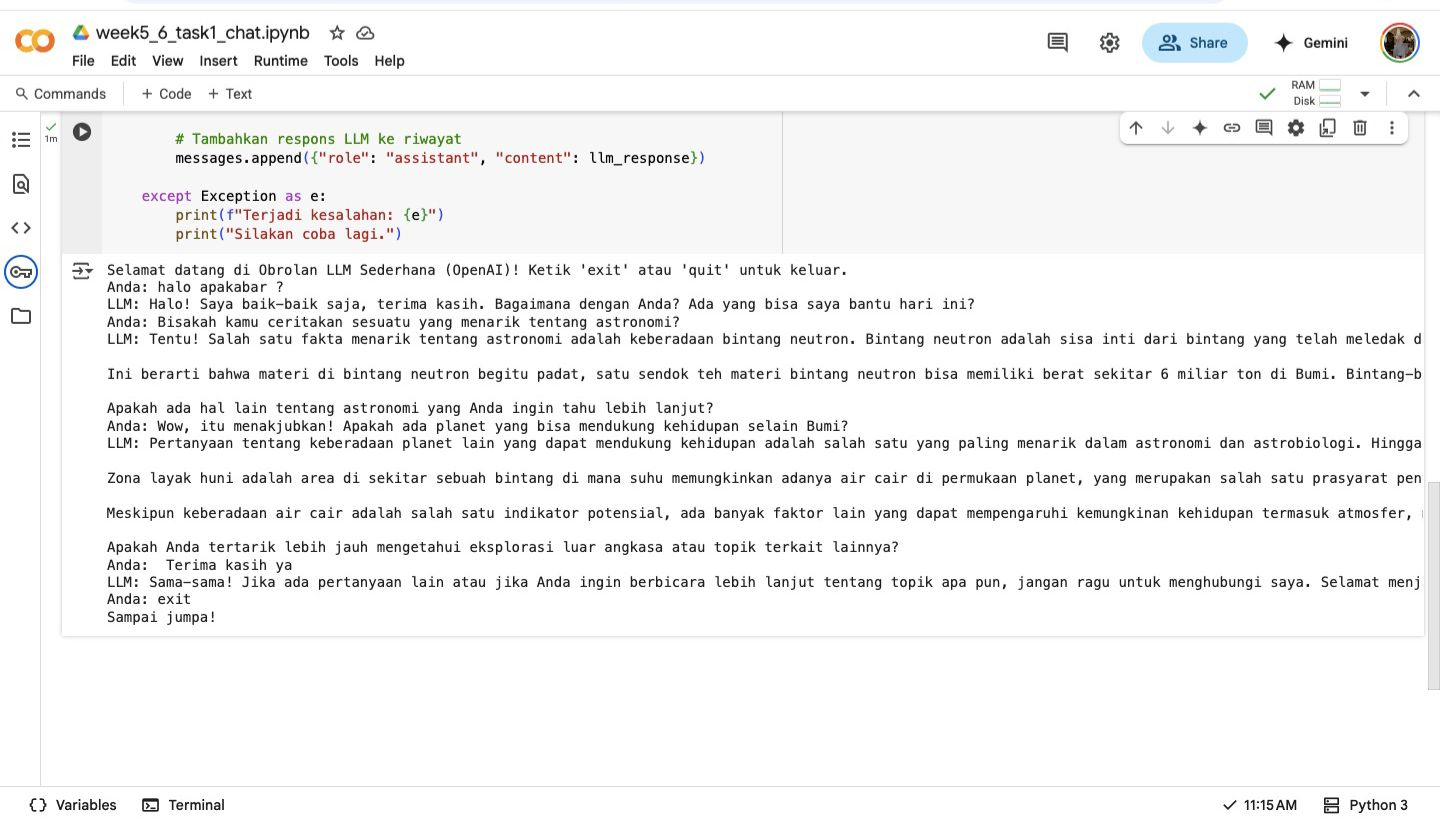

# Task 2: LLM-Powered Tabular Data Processing
Nama Dataset: Produk Elektronik Fiktif
Sumber: Dataset ini adalah dataset sintetis yang dibuat secara inline dalam kode Python notebook ini.
Alasan Pemilihan:
Sintetis: Memudahkan untuk mendefinisikan struktur data dan konten yang persis sesuai dengan kebutuhan tugas, tanpa perlu mengunduh file eksternal atau menangani preprocessing data dunia nyata yang kompleks.
Relevansi: Kolom description produk elektronik menyediakan teks yang kaya dan bervariasi, sangat cocok untuk tugas-tugas ekstraksi fitur dan kategorisasi menggunakan LLM.
Ukuran: Dengan 7 baris, dataset ini cukup kecil untuk diulang secara efisien selama pengembangan, tetapi cukup besar untuk menunjukkan fungsionalitas pemrosesan multi-baris.

Analisis deskripsi produk berikut dan berikan:
1. Kategori produk yang lebih spesifik (misal: "Smartphone Gaming", "Smartwatch Fitness", "Earbuds ANC", dll.)
2. Tiga fitur utama produk dalam format poin-poin.
3. Target audiens utama.

Format output sebagai JSON seperti ini:
```json
{{
    "spesifik_kategori": "...",
    "fitur_utama": [
        "Fitur 1",
        "Fitur 2",
        "Fitur 3"
    ],
    "target_audiens": "..."
}}

In [6]:
# week5_6_task2_data_processing_llm.ipynb

# 1. Install library yang dibutuhkan
# Perbaikan: Hanya ada satu 'pip' setelah tanda seru
!pip install -q pandas openai

# 2. Import Libraries
import pandas as pd
from openai import OpenAI
from google.colab import userdata
import io # Untuk membaca string sebagai file CSV
import json # Untuk parsing JSON

# 3. Konfigurasi OpenAI API Key (dari Colab Secrets)
try:
    API_KEY = userdata.get('OPENAI_API_KEY')
    if API_KEY is None:
        raise ValueError("OPENAI_API_KEY tidak ditemukan di Colab Secrets.")
except Exception as e:
    print(f"Error saat mengambil API Key dari Colab Secrets: {e}")
    print("Pastikan Anda sudah menyimpan 'OPENAI_API_KEY' di Colab Secrets dan mencentang 'Notebook access'.")
    exit()

client = OpenAI(api_key=API_KEY)

# 4. Membuat Dataset Sintetis
# Kita akan menyimpannya dalam bentuk string CSV untuk kemudahan di Colab
csv_data = """product_id,product_name,description,category_hint,price
P001,Smartphone X Pro,Flagship smartphone with 6.7-inch OLED display, 108MP camera, 12GB RAM, and 5000mAh battery. Ideal for gaming and photography enthusiasts. Comes with fast charging support.,Mobile,999.99
P002,Smartwatch Ultra,Advanced smartwatch with heart rate monitoring, GPS, sleep tracking, and waterproof design. Perfect for fitness enthusiasts and outdoor adventurers. Long battery life.,Wearable,249.99
P003,Wireless Earbuds Pro,Premium true wireless earbuds with active noise cancellation, transparency mode, and rich bass. 24-hour battery with charging case. Great for music lovers and commuters.,Audio,129.99
P004,Portable SSD 2TB,High-speed external SSD with 2TB storage, USB-C 3.2 Gen 2 support. Durable and compact, perfect for professionals needing fast data transfer on the go.,Storage,179.99
P005,Gaming Laptop Beast,High-performance gaming laptop featuring 15.6-inch QHD 165Hz display, NVIDIA RTX 4070, Intel i7-13700H, and 16GB DDR5 RAM. Designed for competitive gamers.,Laptop,1899.99
P006,Budget Smartphone Lite,Affordable smartphone with 6.5-inch LCD, 48MP camera, 4GB RAM, and 4000mAh battery. Good for basic daily use and social media. Includes basic charger.,Mobile,199.99
P007,Smart TV 55-inch QLED,55-inch QLED 4K Smart TV with HDR10+, Google TV OS, and voice control. immersive viewing experience for movies and shows. Built-in Chromecast.,TV,699.99
"""

# Membaca data CSV ke dalam DataFrame pandas
df = pd.read_csv(io.StringIO(csv_data))

print("Dataset Asli:")
print(df)
print("-" * 50)

# 5. Fungsi untuk Memproses Satu Deskripsi dengan LLM
def process_description_with_llm(description):
    # Default return jika terjadi error atau parsing gagal
    default_output = {
        "spesifik_kategori": "Tidak Terdefinisi",
        "fitur_utama": ["Tidak ada fitur utama yang dapat diekstrak"],
        "target_audiens": "Tidak Terdefinisi"
    }
    try:
        # Prompt untuk LLM
        prompt = f"""
        Analisis deskripsi produk berikut dan berikan:
        1. Kategori produk yang lebih spesifik (misal: "Smartphone Gaming", "Smartwatch Fitness", "Earbuds ANC", dll.)
        2. Tiga fitur utama produk dalam format poin-poin.
        3. Target audiens utama.

        Format output sebagai JSON seperti ini:
        ```json
        {{
            "spesifik_kategori": "...",
            "fitur_utama": [
                "Fitur 1",
                "Fitur 2",
                "Fitur 3"
            ],
            "target_audiens": "..."
        }}
        ```

        Deskripsi Produk:
        "{description}"
        """

        response = client.chat.completions.create(
            model="gpt-4o", # Model OpenAI yang digunakan
            messages=[
                {"role": "system", "content": "Anda adalah asisten analisis produk yang ahli dan selalu memberikan output dalam format JSON yang valid."},
                {"role": "user", "content": prompt}
            ],
            response_format={"type": "json_object"}, # Meminta LLM untuk menghasilkan JSON
            temperature=0.0 # Membuat LLM lebih deterministik dalam format output
        )

        llm_output_str = response.choices[0].message.content
        return json.loads(llm_output_str)

    except json.JSONDecodeError as e:
        print(f"Error JSON Decode untuk deskripsi '{description[:50]}...': {e}")
        print(f"Respons LLM yang gagal parse: {llm_output_str}")
        return default_output
    except Exception as e:
        print(f"Error saat memproses deskripsi '{description[:50]}...': {e}")
        return default_output

# 6. Memproses Setiap Baris Data dengan LLM dan Menambahkan Kolom Baru
processed_results = []
for index, row in df.iterrows():
    print(f"Memproses produk: {row['product_name']} (ID: {row['product_id']})...")
    llm_analysis = process_description_with_llm(row['description'])
    processed_results.append(llm_analysis)

# 7. Mengonversi hasil proses ke DataFrame
# Perbaikan: Pastikan semua dictionary memiliki kunci yang sama sebelum membuat DataFrame
# Ini mencegah error jika ada respons LLM yang tidak lengkap
# Kita ambil semua kunci yang mungkin ada dari semua dictionary
all_keys = set()
for res in processed_results:
    all_keys.update(res.keys())

# Isi nilai yang hilang dengan None atau default jika perlu, lalu buat DataFrame
# Namun, karena kita sudah menggunakan default_output, ini seharusnya lebih stabil
processed_df = pd.DataFrame(processed_results)

# 8. Menggabungkan DataFrame asli dengan hasil pemrosesan LLM
# Perbaikan: Pastikan indeks selaras. Reset index untuk kedua DF jika perlu.
df_reset = df.reset_index(drop=True)
processed_df_reset = processed_df.reset_index(drop=True)

df_final = pd.concat([df_reset, processed_df_reset], axis=1)

print("\nDataset Setelah Diproses LLM:")
# Menggunakan to_string() agar semua baris dan kolom terlihat
print(df_final.to_string())

# Opsional: Simpan hasil ke file CSV baru
# df_final.to_csv("processed_products.csv", index=False)
# print("\nHasil disimpan ke 'processed_products.csv'")

Dataset Asli:
                                                                                                                   product_id  \
P001 Smartphone X Pro       Flagship smartphone with 6.7-inch OLED display                                       108MP camera   
P002 Smartwatch Ultra       Advanced smartwatch with heart rate monitoring                                                GPS   
P003 Wireless Earbuds Pro   Premium true wireless earbuds with active noise...                              transparency mode   
P004 Portable SSD 2TB       High-speed external SSD with 2TB storage             USB-C 3.2 Gen 2 support. Durable and compact   
P005 Gaming Laptop Beast    High-performance gaming laptop featuring 15.6-i...                                NVIDIA RTX 4070   
P006 Budget Smartphone Lite Affordable smartphone with 6.5-inch LCD                                               48MP camera   
P007 Smart TV 55-inch QLED  55-inch QLED 4K Smart TV with HDR10+                   